#### This is the third part of the final project of module 1
#### We are starting over from a dataframe called df4 that was exported in the jupyter notebook analysis_part1.ipynb
### GOAL : Determine if the movie business is a profitable business using repeated random selections of existing movies


In [5]:
import pandas as pd
df4= pd.read_csv('./Data/df4.csv')
df4

,Unnamed: 0,movie_and_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,profit,profit_ratio,profit_lmh
0,0,Higher Power_2018,67,2018-05-11,Higher Power,500000,528,528,2018,49123,tt2924392,Higher Power,Higher Power,2018,93.0,"Action,Sci-Fi,Thriller",-499472,0.001056,low
1,1,The Ghastly Love of Johnny X_2012,74,2012-10-26,The Ghastly Love of Johnny X,2000000,2436,2436,2012,16165,tt1754633,The Ghastly Love of Johnny X,The Ghastly Love of Johnny X,2012,106.0,"Comedy,Fantasy,Musical",-1997564,0.001218,low
2,2,10 Days in a Madhouse_2015,48,2015-11-11,10 Days in a Madhouse,12000000,14616,14616,2015,59400,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,-11985384,0.001218,low
3,3,Area 51_2015,81,2015-05-15,Area 51,5000000,7556,7556,2015,8624,tt1519461,Area 51,Area 51,2015,91.0,"Horror,Sci-Fi,Thriller",-4992444,0.001511,low
4,4,Freaks of Nature_2015,83,2015-10-30,Freaks of Nature,33000000,70958,70958,2015,18716,tt1817771,Freaks of Nature,Freaks of Nature,2015,92.0,"Comedy,Horror,Sci-Fi",-32929042,0.002150,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,1363,Paranormal Activity 3_2011,51,2011-10-21,Paranormal Activity 3,5000000,104028807,207039844,2011,17175,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller",202039844,41.407969,high
1364,1364,Chernobyl Diaries_2012,18,2012-05-25,Chernobyl Diaries,1000000,18119640,42411721,2012,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86.0,"Horror,Mystery,Thriller",41411721,42.411721,high
1365,1365,Moonlight_2016,64,2016-10-21,Moonlight,1500000,27854931,65245512,2016,85930,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,63745512,43.497008,high
1366,1366,Get Out_2017,49,2017-02-24,Get Out,5000000,176040665,255367951,2017,87039,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",250367951,51.073590,high


In [89]:
import numpy as np

# function to get avg profit ratio from p random movies based on dataframe df4
def random_avg_profit(p):
# pick p movies randomly
    import numpy as np
    random_movie_indexes=np.random.randint(0,1367,p)
# get the corresponding profit_ratio values and average them
    avg =0
    for i in random_movie_indexes:
        avg += (df4['profit_ratio'][i])/p
    return avg

In [91]:
# run random_avg_profit 1000 times and graph the values
# that corresponds to 1000 possible sets of 10 movies.
## ie. 1000 possible outcomes for the 10 first movies of our new movie company
random_avg_profit_list=[]
for i in range(1000):
    random_avg_profit_list.append(random_avg_profit(10))
df5 = pd.DataFrame(list(enumerate(random_avg_profit_list)))
df5
df5.columns=['x','y']
df5['x'] = df5['x']+1
df5

,x,y
0,1,4.072495
1,2,2.105045
2,3,4.161183
3,4,3.803809
4,5,1.913566
...,...,...
995,996,3.276199
996,997,2.430321
997,998,3.255394
998,999,5.158906


Text(0.5, 0, 'each x is a different outcome of a random choice of 10 movies')

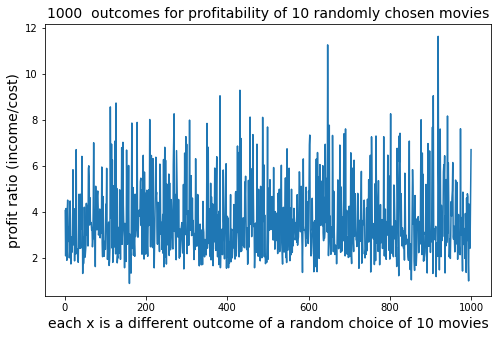

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8,5))
sns.lineplot(x='x',y = 'y',data = df5)
plt.title("1000  outcomes for profitability of 10 randomly chosen movies", fontsize=14)
plt.ylabel("profit ratio (income/cost)", fontsize=14)
plt.xlabel("each x is a different outcome of a random choice of 10 movies", fontsize=14)


In [94]:
df5.describe()

,x,y
count,1000.000000,1000.000000
mean,500.500000,3.619220
std,288.819436,1.550639
min,1.000000,0.907674
25%,250.750000,2.510048
50%,500.500000,3.233445
75%,750.250000,4.406197
max,1000.000000,11.634064


### Conclusion:
#### Getting into the movie business is a good choice as the level of profits is generally high: With 10 randomly chosen movies, our min and max profit ratio are ~.9 to ~11.6, and the mean is between 3 and 4. Pretty good!

In [95]:
# let's try a different simulation
# random distribution of number of movies made. 100 values between 1 movie and 100 movies
np.random.randint(1,100,1000)

array([74, 89, 98, 82, 39, 59, 58, 57, 60, 11, 27, 36, 23, 10,  7, 25, 97,
       50, 17, 45, 37, 23, 12, 27, 77, 33, 31, 28, 58, 87, 27, 89, 46, 67,
       76, 17, 32, 11, 80, 70, 67,  4, 20, 70, 10, 60, 74, 80, 74, 46, 55,
       26, 59, 28, 23, 43, 30, 74, 90, 99, 86, 26, 33, 80, 97, 48, 30, 52,
       88, 41, 61, 83, 40, 29, 98,  7, 33, 59, 76, 95, 44, 16, 31, 99, 17,
       28, 19, 52, 17, 47, 80, 67, 75,  2,  9, 47,  8, 62, 53, 52,  9, 42,
       43, 76, 27, 66, 79, 94, 62, 14, 25, 84, 14, 10, 51, 81, 16, 43, 22,
       50, 87, 71, 94,  1, 77, 20, 82, 92, 48, 98, 59, 34, 56, 75, 33, 53,
       42, 76, 15, 31, 49,  2, 59,  3, 89, 72, 40, 26, 49, 59, 79, 17, 53,
       20, 17, 96, 91, 17, 74, 32, 66, 91, 62, 85, 74,  6, 49, 28, 69, 13,
       63, 22, 85, 42, 99, 98, 78,  1, 94, 33, 79, 74, 66, 55, 49, 29, 35,
       97, 47, 76, 79, 18, 79, 87,  4, 22, 42,  2, 62, 26, 88, 18, 69, 63,
       55,  4, 14, 39, 10, 53, 89, 56, 79, 33, 16, 81, 68, 18, 38, 68, 75,
       67, 32, 98, 57, 21

In [96]:
# let's find the corresponding random movies and avg profit ratio in df4
number_of_movies_list=[]
avg_profit_ratio_list=[]

for number_of_movies in np.random.randint(1,100,1000):
    number_of_movies_list.append(number_of_movies)
    avg_profit_ratio_list.append(random_avg_profit(number_of_movies))
    
# print(number_of_movies_list)
# print(avg_profit_ratio_list)
#list(zip(number_of_movies_list,avg_profit_ratio_list))

# make a dataframe out of the results
df6 = pd.DataFrame( list(zip(number_of_movies_list,avg_profit_ratio_list)) )

df6.columns=['x','y']

df6.sort_values(by='x')

,x,y
893,1,3.345398
745,1,4.011785
675,1,5.763028
364,1,5.105900
326,1,3.653861
...,...,...
856,99,2.727017
464,99,4.192350
443,99,3.944383
643,99,3.457302


Text(0.5, 0, 'number of movies (randomly chosen)')

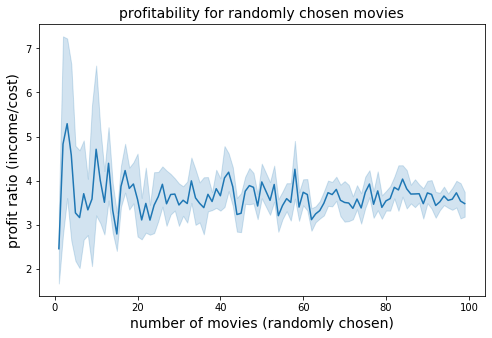

In [97]:
fig = plt.figure(figsize=(8,5))
sns.lineplot(x='x',y = 'y',data = df6)
plt.title("profitability for randomly chosen movies", fontsize=14)
plt.ylabel("profit ratio (income/cost)", fontsize=14)
plt.xlabel("number of movies (randomly chosen)", fontsize=14)

In [98]:
df6.describe()

,x,y
count,1000.000000,1000.000000
mean,49.821000,3.653525
std,29.145367,1.116093
min,1.000000,0.028182
25%,25.000000,3.062183
50%,48.000000,3.564170
75%,76.000000,4.073450
max,99.000000,14.751393


### Conclusion:
#### Again we see that the movie business is quite lucrative. After 20 movies, we are almost certain to reach a profit ratio higher than 3.


### New question:
#### For each profit ratio value, how many of the 1000 outcomes gave that value? 

In [99]:
df6

,x,y
0,93,3.012268
1,31,3.771114
2,15,4.449536
3,63,2.778699
4,96,3.267728
...,...,...
995,54,2.021280
996,18,3.476785
997,25,5.467243
998,71,2.987511


In [102]:
df6['y'] = round(df6['y'], 1)

In [105]:
df6.columns = ['number_of_movies','avg_profit_ratio']

In [106]:
df6

,number_of_movies,avg_profit_ratio
0,93,3.0
1,31,3.8
2,15,4.4
3,63,2.8
4,96,3.3
...,...,...
995,54,2.0
996,18,3.5
997,25,5.5
998,71,3.0


In [138]:
profit_ratio_list=[]
number_of_occurences_list=[]
for i in range(0,150):
    profit_ratio_list.append(i/10)
    number_of_occurences_list.append(df6.loc[df6['avg_profit_ratio'] == i/10].shape[0])

# create a new dataframe with the number of occurences 
# l=dict(zip(profit_ratio_list,number_of_occurences_list))
# l
# df7=pd.DataFrame(l)
# df7
d = {'col1': profit_ratio_list, 'col2': number_of_occurences_list}
df7=pd.DataFrame(d)
df7

,col1,col2
0,0.0,1
1,0.1,0
2,0.2,0
3,0.3,1
4,0.4,0
...,...,...
145,14.5,0
146,14.6,0
147,14.7,0
148,14.8,1


Text(0.5, 0, 'profit ratio')

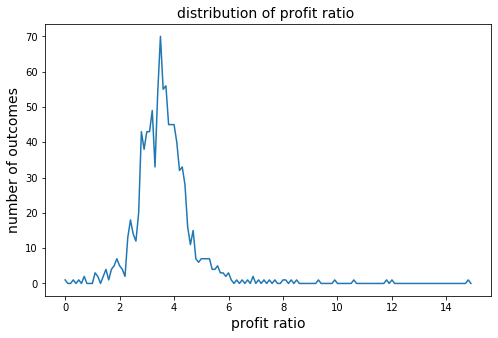

In [139]:
fig = plt.figure(figsize=(8,5))
sns.lineplot(x='col1',y = 'col2',data = df7)
plt.title("distribution of profit ratio ", fontsize=14)
plt.ylabel("number of outcomes", fontsize=14)
plt.xlabel("profit ratio", fontsize=14)